In [13]:
import torch
import numpy as np

# Define the analytic function f
def analytic_function(point):
    x, y = point[:, 0], point[:, 1]
    z1 = torch.sin(x) + y
    z2 = torch.cos(y) - x
    z3 = x**2 + y**2
    return torch.stack([z1, z2, z3], dim=1)

# Define symbolic Jacobian for testing
def symbolic_jacobian(x, y):
    J = np.array([
        [np.cos(x), 1],
        [-1, -np.sin(y)],
        [2 * x, 2 * y]
    ])
    return J

# Numerical Jacobian function
def compute_jacobian_autograd_single_point(func, point):
    point_tensor = torch.tensor([point], dtype=torch.float32, requires_grad=True)
    jacobian = torch.autograd.functional.jacobian(func, point_tensor)  # Shape: (3, 1, 2)
    return jacobian.squeeze(1).detach().numpy()  # Reshape to (3, 2)

def compute_jacobian_implement(x, y, eps):
    # Create tensors for the input points
    point_hor_plus = torch.tensor([[x + eps, y]], dtype=torch.float32) 
    point_hor_minus = torch.tensor([[x - eps, y]], dtype=torch.float32)
    point_ver_plus = torch.tensor([[x, y + eps]], dtype=torch.float32)
    point_ver_minus = torch.tensor([[x, y - eps]], dtype=torch.float32)
    
    # Evaluate function at shifted points
    f_x_plus_eps = analytic_function(point_hor_plus).detach().numpy().squeeze()  # Ensure 1D
    f_x_minus_eps = analytic_function(point_hor_minus).detach().numpy().squeeze()
    f_y_plus_eps = analytic_function(point_ver_plus).detach().numpy().squeeze()
    f_y_minus_eps = analytic_function(point_ver_minus).detach().numpy().squeeze()
    
    # Compute partial derivatives using finite differences
    df_dx = (f_x_plus_eps - f_x_minus_eps) / (2 * eps)
    df_dy = (f_y_plus_eps - f_y_minus_eps) / (2 * eps)
    
    # Construct the Jacobian (3x2 matrix)
    J = np.column_stack((df_dx, df_dy))
    return J


In [ ]:
# Define a grid point for testing
x = 0.5
y = -0.5
test_point = np.array([x, y])

# Compute the symbolic Jacobian
symbolic_J = symbolic_jacobian(test_point[0], test_point[1])

# Compute the numerical Jacobian using autograd
numerical_J = compute_jacobian_autograd_single_point(analytic_function, test_point)

implent_j = compute_jacobian_implement(x, y, 1e-3)


# Compare the results
print("Symbolic Jacobian:\n", symbolic_J)
print("Numerical Jacobian:\n", numerical_J)
print('Implementation', implent_j)

print("Difference:\n", implent_j - symbolic_J)
print("Difference:\n", numerical_J - symbolic_J)

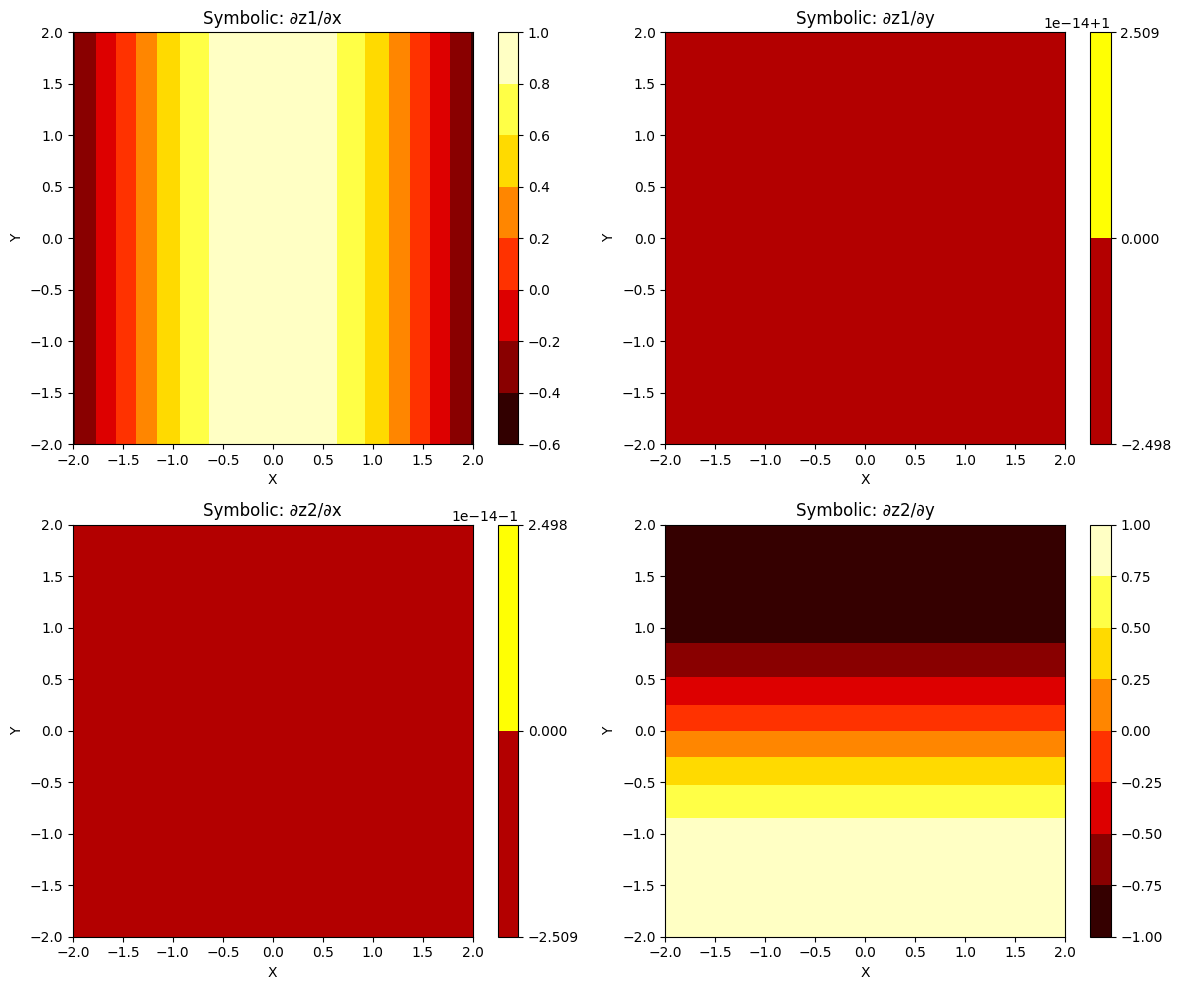

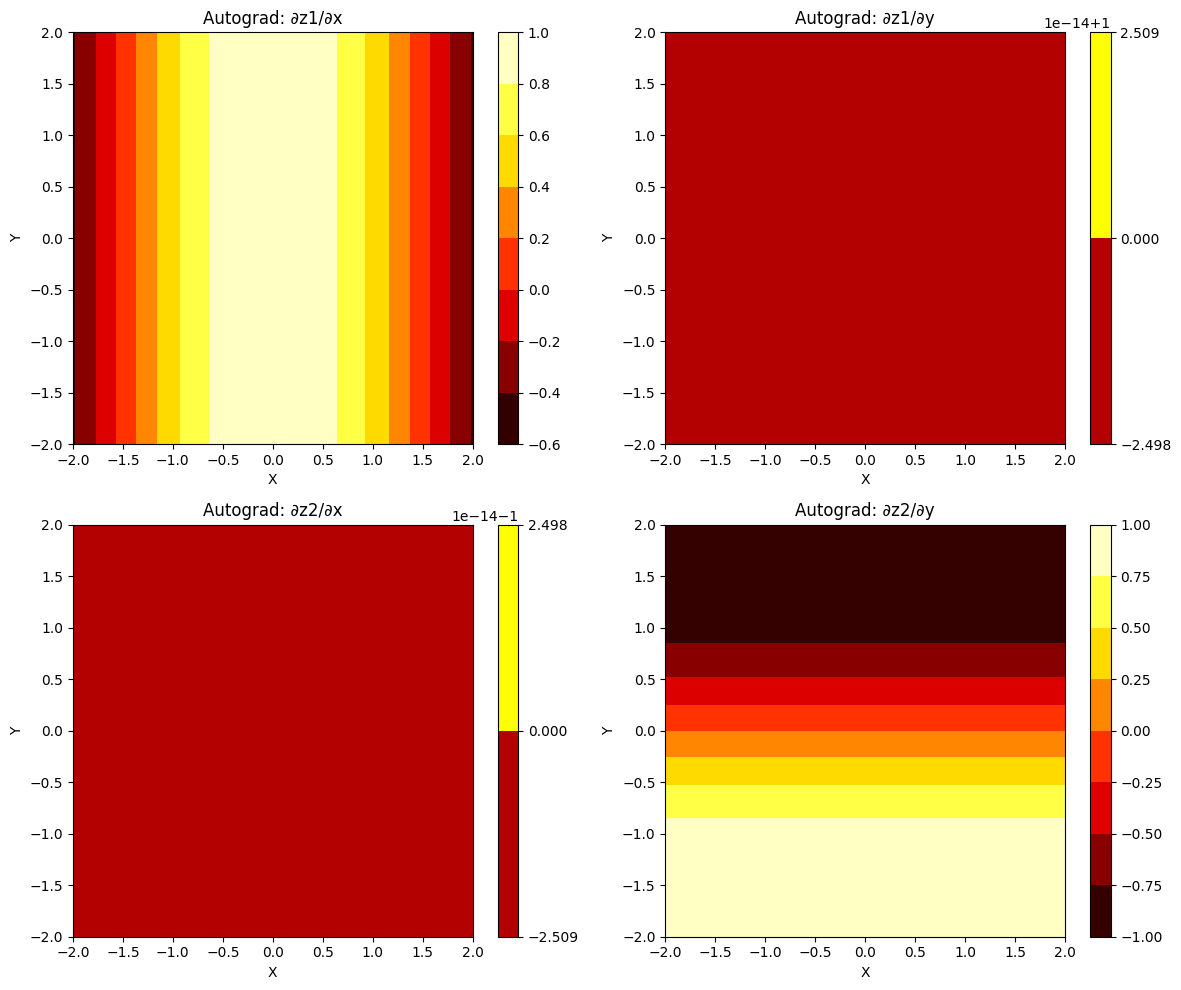

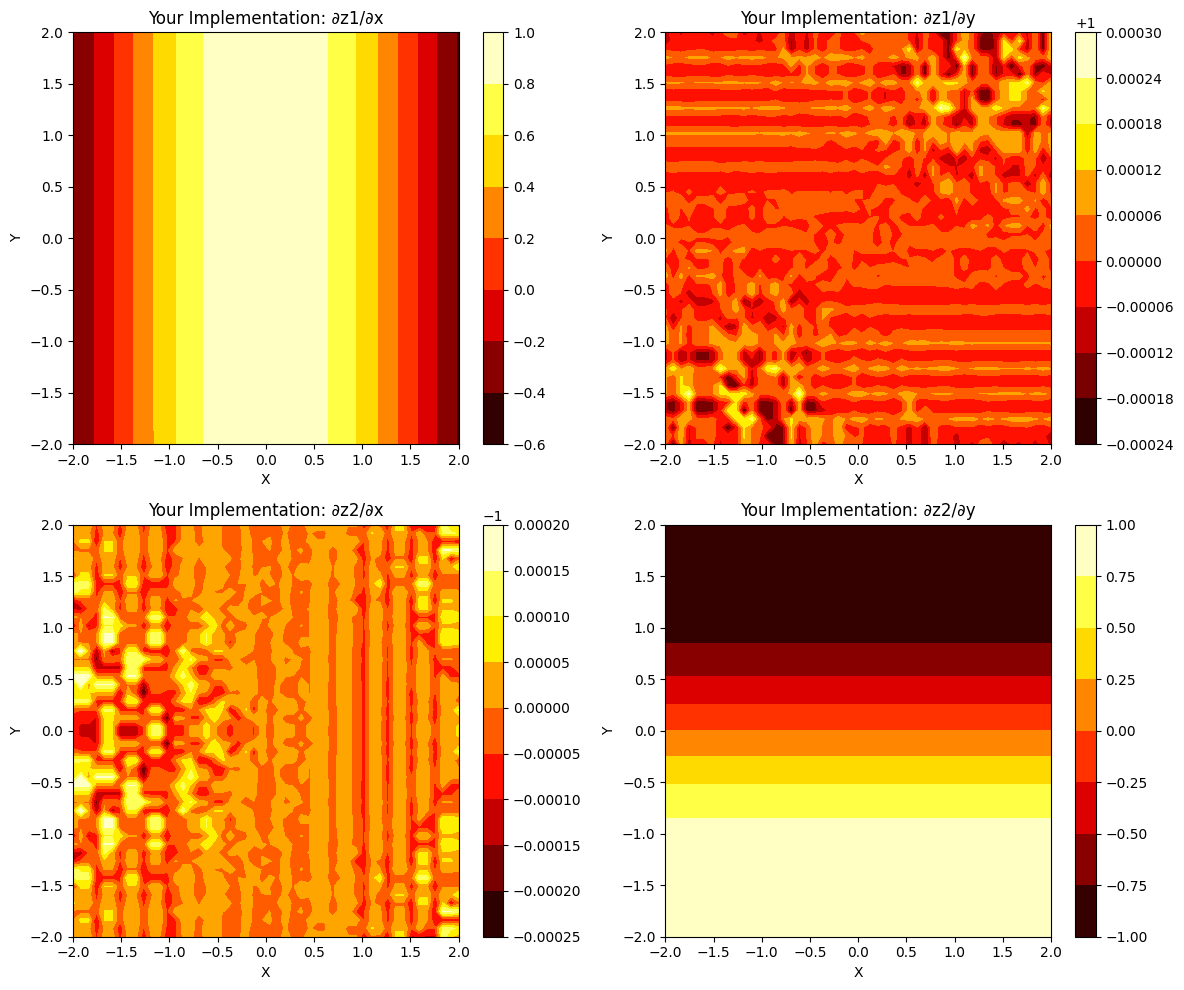

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
X = StandardScaler().fit_transform(X)  # Standardize features

# Define an analytic function for transformation
def analytic_function(point):
    x, y = point[:, 0], point[:, 1]
    z1 = torch.sin(x) + y
    z2 = torch.cos(y) - x
    return torch.stack([z1, z2], dim=1)

# Symbolic Jacobian
def symbolic_jacobian(x, y):
    return np.array([
        [np.cos(x), 1],
        [-1, -np.sin(y)],
    ])

# Numerical Jacobian using autograd
def compute_jacobian_autograd(func, point):
    point_tensor = torch.tensor([point], dtype=torch.float32, requires_grad=True)
    jacobian = torch.autograd.functional.jacobian(func, point_tensor)
    
    # Remove batch dimension and ensure correct shape
    jacobian = jacobian.squeeze(0).squeeze(1).detach().numpy()
    
    return jacobian

# # Your implementation for numerical Jacobian
# def compute_jacobian_implement(x, y, eps):
#     point_hor_plus = torch.tensor([[x + eps, y]], dtype=torch.float32, requires_grad=True) 
#     point_hor_minus = torch.tensor([[x - eps, y]], dtype=torch.float32, requires_grad=True)
#     point_ver_plus = torch.tensor([[x, y + eps]], dtype=torch.float32, requires_grad=True)
#     point_ver_minus = torch.tensor([[x, y - eps]], dtype=torch.float32, requires_grad=True)
    
#     f_x_plus_eps = analytic_function(point_hor_plus).squeeze()
#     f_x_minus_eps = analytic_function(point_hor_minus).squeeze()
#     f_y_plus_eps = analytic_function(point_ver_plus).squeeze()
#     f_y_minus_eps = analytic_function(point_ver_minus).squeeze()
    
#     # f_x_plus_eps = f_x_plus_eps.detach().numpy()
#     # f_x_minus_eps = f_x_minus_eps.detach().numpy()
#     # f_y_plus_eps = f_y_plus_eps.detach().numpy()
#     # f_y_minus_eps = f_y_minus_eps.detach().numpy()

#     df_dx = (f_x_plus_eps - f_x_minus_eps) / (2 * eps)
#     df_dy = (f_y_plus_eps - f_y_minus_eps) / (2 * eps)
    
#     # return np.column_stack((df_dx, df_dy))
#     # Convert to numpy and return stacked Jacobian
#     return torch.hstack((df_dx, df_dy)).detach().numpy()



##########################################################################################
# def compute_jacobian_implement(x, y, eps=1e-5):
#     # Define central difference perturbations for each partial derivative
#     point = torch.tensor([[x, y]], dtype=torch.float32, requires_grad=True)
    
#     # Partial derivatives w.r.t x
#     point_x_plus = point.clone()
#     point_x_minus = point.clone()
#     point_x_plus[0, 0] += eps
#     point_x_minus[0, 0] -= eps
    
#     f_x_plus = analytic_function(point_x_plus)
#     f_x_minus = analytic_function(point_x_minus)
#     df_dx = (f_x_plus - f_x_minus) / (2 * eps)
    
#     # Partial derivatives w.r.t y
#     point_y_plus = point.clone()
#     point_y_minus = point.clone()
#     point_y_plus[0, 1] += eps
#     point_y_minus[0, 1] -= eps
    
#     f_y_plus = analytic_function(point_y_plus)
#     f_y_minus = analytic_function(point_y_minus)
#     df_dy = (f_y_plus - f_y_minus) / (2 * eps)
    
#     # Stack gradients to form a Jacobian matrix [ [df1/dx, df1/dy], [df2/dx, df2/dy] ]
#     jacobian = torch.stack([df_dx.squeeze(), df_dy.squeeze()], dim=1)
    
#     return jacobian.detach().numpy()

def compute_jacobian_implement(x, y, eps=1e-5):
    # Create tensor point for cloning
    point = torch.tensor([[x, y]], dtype=torch.float32)

    # Partial derivative w.r.t. x using five-point stencil
    f_x_2plus = analytic_function(torch.tensor([[x + 2 * eps, y]], dtype=torch.float32))
    f_x_plus = analytic_function(torch.tensor([[x + eps, y]], dtype=torch.float32))
    f_x_minus = analytic_function(torch.tensor([[x - eps, y]], dtype=torch.float32))
    f_x_2minus = analytic_function(torch.tensor([[x - 2 * eps, y]], dtype=torch.float32))
    
    df_dx = (-f_x_2plus + 8 * f_x_plus - 8 * f_x_minus + f_x_2minus) / (12 * eps)

    # Partial derivative w.r.t. y using five-point stencil
    f_y_2plus = analytic_function(torch.tensor([[x, y + 2 * eps]], dtype=torch.float32))
    f_y_plus = analytic_function(torch.tensor([[x, y + eps]], dtype=torch.float32))
    f_y_minus = analytic_function(torch.tensor([[x, y - eps]], dtype=torch.float32))
    f_y_2minus = analytic_function(torch.tensor([[x, y - 2 * eps]], dtype=torch.float32))
    
    df_dy = (-f_y_2plus + 8 * f_y_plus - 8 * f_y_minus + f_y_2minus) / (12 * eps)

    # Stack results to form Jacobian matrix
    jacobian = torch.stack([df_dx.squeeze(), df_dy.squeeze()], dim=1)
    
    return jacobian.detach().numpy()


#############################################################################################

# Create grid for heatmap
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))

# Initialize arrays to store Jacobian components for each method
jacobian_symbolic = np.zeros((grid_x.shape[0], grid_x.shape[1], 2, 2))
jacobian_autograd = np.zeros_like(jacobian_symbolic)
jacobian_implement = np.zeros_like(jacobian_symbolic)

for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        x, y = grid_x[i, j], grid_y[i, j]
        symbolic_J = symbolic_jacobian(x, y)
        autograd_J = compute_jacobian_autograd(analytic_function, [x, y])
        implement_J = compute_jacobian_implement(x, y, 1e-3)
        
        jacobian_symbolic[i, j] = symbolic_J
        jacobian_autograd[i, j] = autograd_J
        jacobian_implement[i, j] = implement_J

# Function to plot heatmaps for each Jacobian component
def plot_jacobian_heatmaps(jacobian, method_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    components = [(0, 0), (0, 1), (1, 0), (1, 1)]
    titles = [
        f'{method_name}: ∂z1/∂x', f'{method_name}: ∂z1/∂y',
        f'{method_name}: ∂z2/∂x', f'{method_name}: ∂z2/∂y'
    ]
    
    for idx, ax in enumerate(axes.flatten()):
        comp_x, comp_y = components[idx]
        heatmap_data = jacobian[:, :, comp_x, comp_y]
        im = ax.contourf(grid_x, grid_y, heatmap_data, cmap='hot')
        fig.colorbar(im, ax=ax)
        ax.set_title(titles[idx])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    
    plt.tight_layout()
    plt.show()

# Plot heatmaps for each method
plot_jacobian_heatmaps(jacobian_symbolic, "Symbolic")
plot_jacobian_heatmaps(jacobian_autograd, "Autograd")
plot_jacobian_heatmaps(jacobian_implement, "Your Implementation")


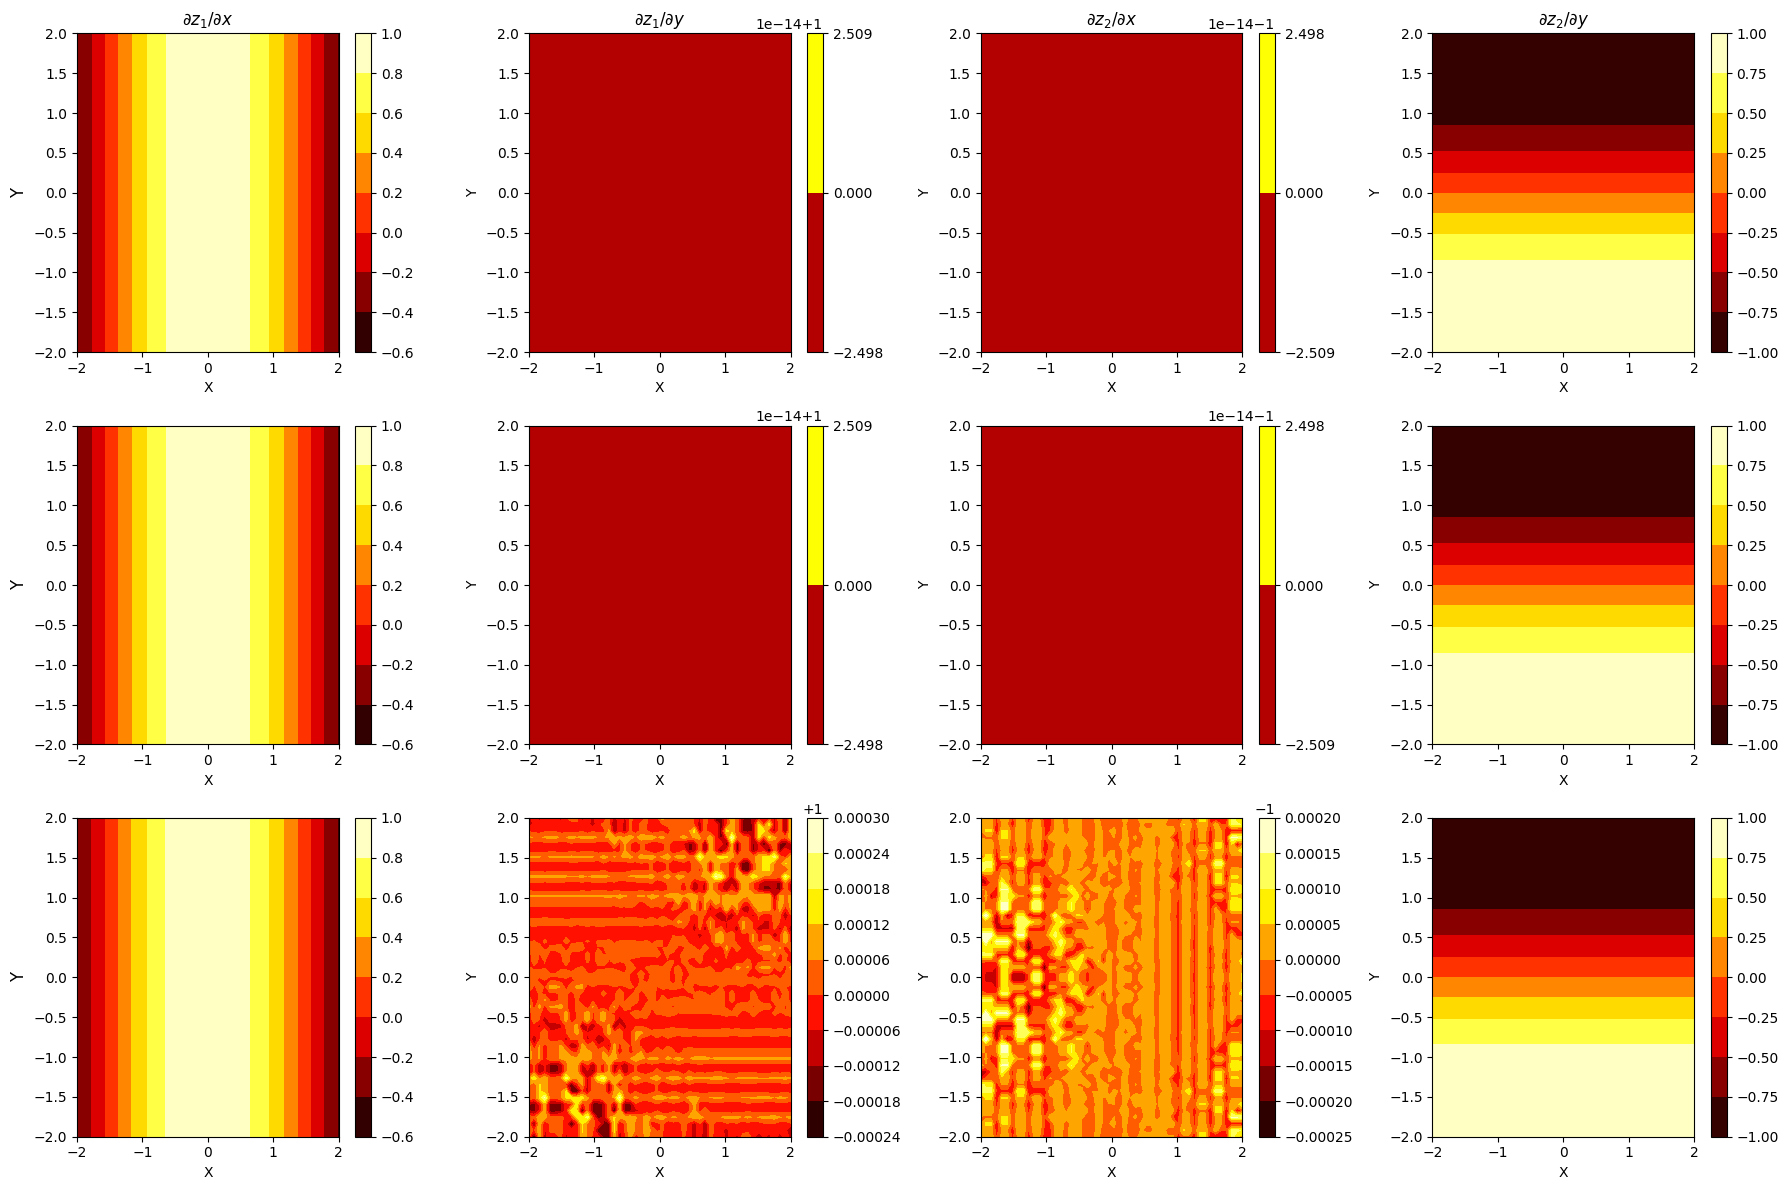

In [8]:
def plot_all_jacobian_methods(
    jacobian_symbolic, jacobian_autograd, jacobian_implement, grid_x, grid_y
):
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 3 methods, 4 components
    
    methods = [
        ("Symbolic", jacobian_symbolic),
        ("Autograd", jacobian_autograd),
        ("Your Implementation", jacobian_implement),
    ]
    
    components = [(0, 0), (0, 1), (1, 0), (1, 1)]
    titles = [r'$\partial z_1/\partial x$', r'$\partial z_1/\partial y$', 
              r'$\partial z_2/\partial x$', r'$\partial z_2/\partial y$']
    
    for row, (method_name, jacobian) in enumerate(methods):
        for col, (comp_x, comp_y) in enumerate(components):
            ax = axes[row, col]
            heatmap_data = jacobian[:, :, comp_x, comp_y]
            im = ax.contourf(grid_x, grid_y, heatmap_data, cmap='hot')
            fig.colorbar(im, ax=ax)
            
            # Set titles and labels
            if row == 0:  # Title only for the top row
                ax.set_title(titles[col])
            if col == 0:  # Y-label for the left column
                ax.set_ylabel(f'{method_name}', fontsize=12)
            
            ax.set_xlabel('X')
            ax.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_all_jacobian_methods(jacobian_symbolic, jacobian_autograd, jacobian_implement, grid_x, grid_y)


# using IRIS dataset above is not using

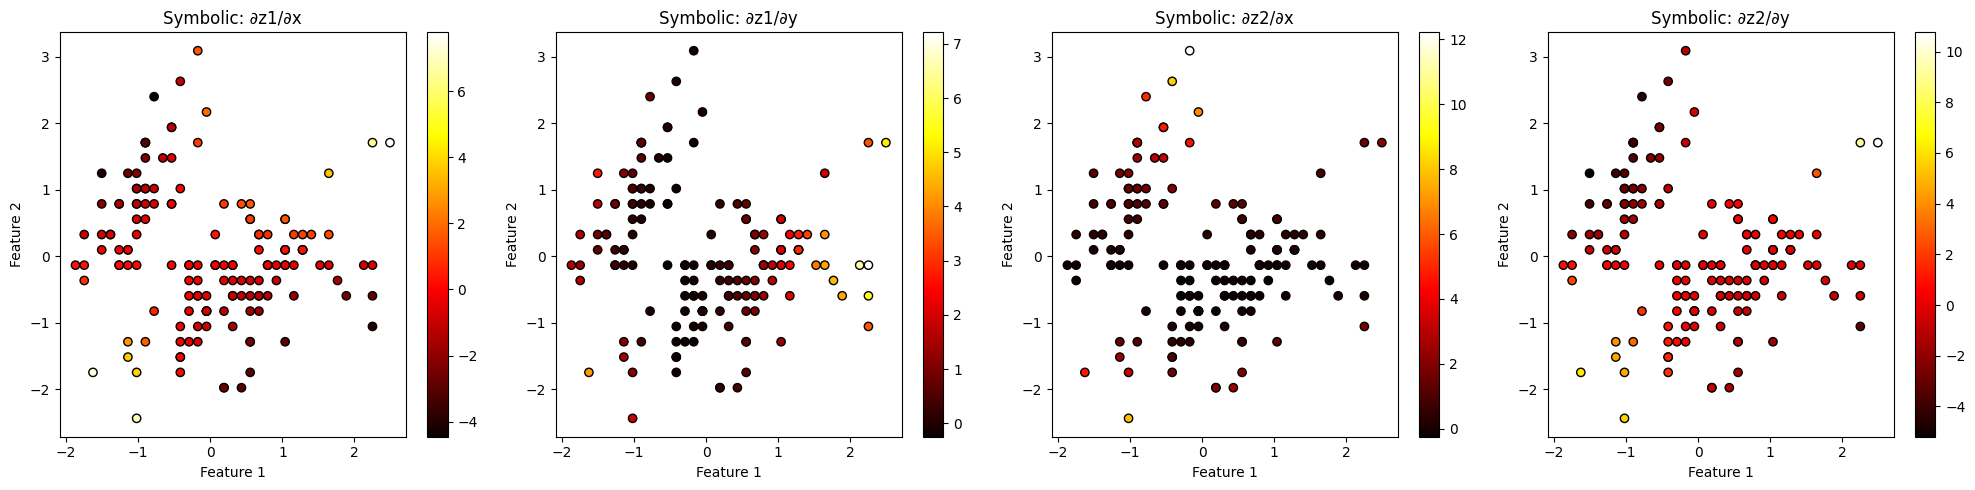

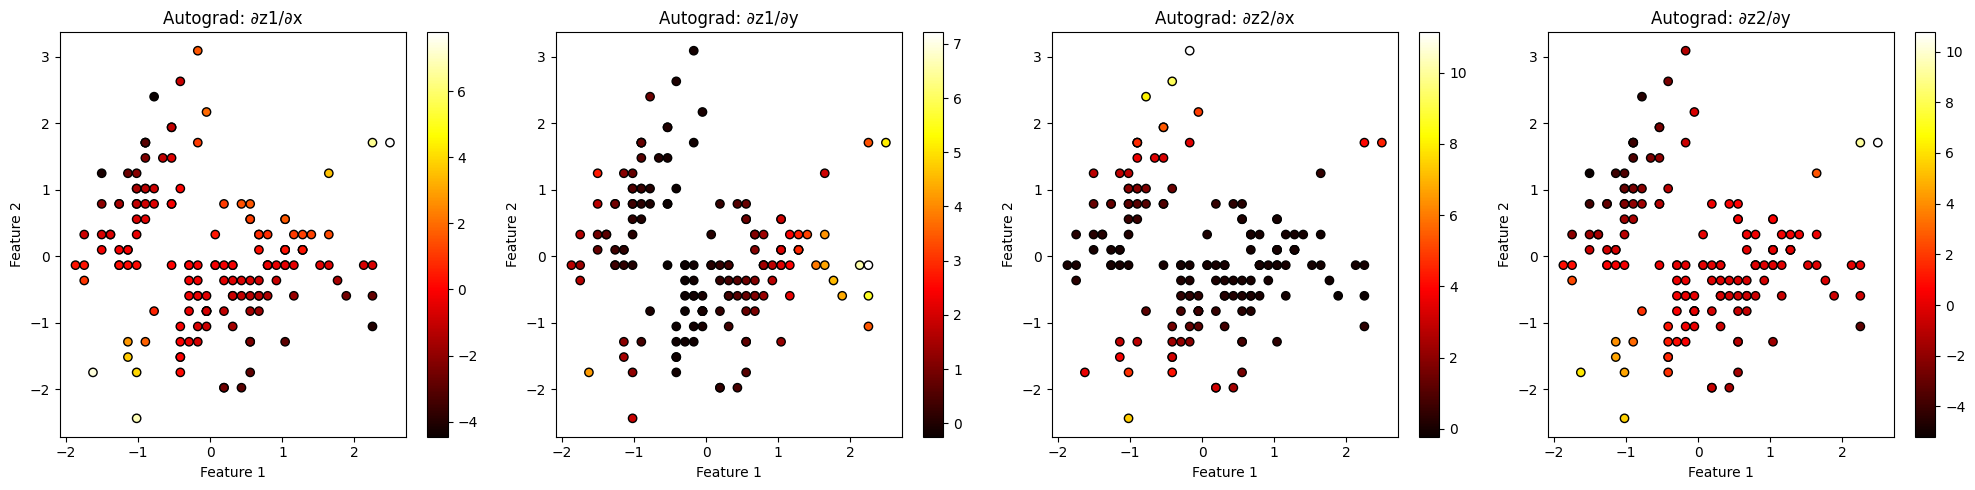

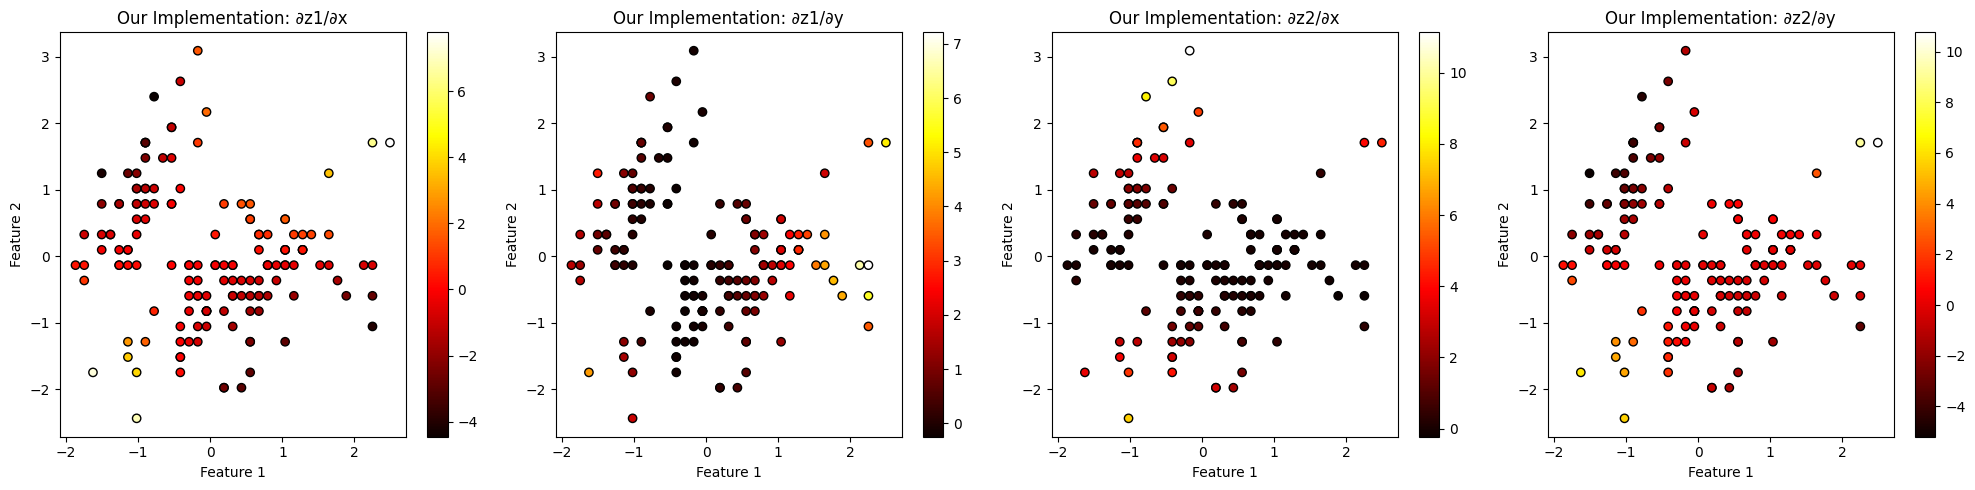

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
X = StandardScaler().fit_transform(X)  # Standardize features

# # Define an analytic function for transformation
# def analytic_function(point):
#     x, y = point[:, 0], point[:, 1]
#     z1 = torch.sin(x) + y
#     z2 = torch.cos(y) - x
#     return torch.stack([z1, z2], dim=1)

# # Symbolic Jacobian
# def symbolic_jacobian(x, y):
#     return np.array([
#         [np.cos(x), 1],
#         [-1, -np.sin(y)],
#     ])

# New analytic function
def analytic_function(point):
    x, y = point[:, 0], point[:, 1]
    z1 = x**2 * y + torch.sin(x * y)
    z2 = y**2 * x + torch.cos(x * y)
    return torch.stack([z1, z2], dim=1)

# Symbolic Jacobian
def symbolic_jacobian(x, y):
    return np.array([
        [2 * x * y + y * np.cos(x * y), x**2 + x * np.cos(x * y)],
        [y**2 + y * np.cos(x * y), 2 * y * x - x * np.sin(x * y)],
    ])


# Numerical Jacobian using autograd
def compute_jacobian_autograd(func, point):
    point_tensor = torch.tensor([point], dtype=torch.float32, requires_grad=True)
    jacobian = torch.autograd.functional.jacobian(func, point_tensor)
    return jacobian.squeeze(0).squeeze(1).detach().numpy()

# Five-point stencil for numerical Jacobian
def compute_jacobian_implement(x, y, eps=1e-5):
    # Compute partial derivatives using five-point stencil
    f_x_2plus = analytic_function(torch.tensor([[x + 2 * eps, y]], dtype=torch.float32))
    f_x_plus = analytic_function(torch.tensor([[x + eps, y]], dtype=torch.float32))
    f_x_minus = analytic_function(torch.tensor([[x - eps, y]], dtype=torch.float32))
    f_x_2minus = analytic_function(torch.tensor([[x - 2 * eps, y]], dtype=torch.float32))
    df_dx = (-f_x_2plus + 8 * f_x_plus - 8 * f_x_minus + f_x_2minus) / (12 * eps)

    f_y_2plus = analytic_function(torch.tensor([[x, y + 2 * eps]], dtype=torch.float32))
    f_y_plus = analytic_function(torch.tensor([[x, y + eps]], dtype=torch.float32))
    f_y_minus = analytic_function(torch.tensor([[x, y - eps]], dtype=torch.float32))
    f_y_2minus = analytic_function(torch.tensor([[x, y - 2 * eps]], dtype=torch.float32))
    df_dy = (-f_y_2plus + 8 * f_y_plus - 8 * f_y_minus + f_y_2minus) / (12 * eps)

    return torch.stack([df_dx.squeeze(), df_dy.squeeze()], dim=1).detach().numpy()

# Calculate Jacobians for each point in the Iris dataset
jacobian_symbolic = np.zeros((X.shape[0], 2, 2))
jacobian_autograd = np.zeros_like(jacobian_symbolic)
jacobian_implement = np.zeros_like(jacobian_symbolic)

for i, (x, y) in enumerate(X):
    symbolic_J = symbolic_jacobian(x, y)
    autograd_J = compute_jacobian_autograd(analytic_function, [x, y])
    implement_J = compute_jacobian_implement(x, y, 1e-4)
    
    jacobian_symbolic[i] = symbolic_J
    jacobian_autograd[i] = autograd_J
    jacobian_implement[i] = implement_J

# Function to plot heatmaps for each method
def plot_jacobian_heatmaps(jacobian, method_name):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    components = [(0, 0), (0, 1), (1, 0), (1, 1)]
    titles = [
        f'{method_name}: ∂z1/∂x', f'{method_name}: ∂z1/∂y',
        f'{method_name}: ∂z2/∂x', f'{method_name}: ∂z2/∂y'
    ]
    
    for idx, ax in enumerate(axes):
        comp_x, comp_y = components[idx]
        heatmap_data = jacobian[:, comp_x, comp_y]
        scatter = ax.scatter(X[:, 0], X[:, 1], c=heatmap_data, cmap='hot', edgecolor='k')
        fig.colorbar(scatter, ax=ax)
        ax.set_title(titles[idx])
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

# Plot heatmaps for each method
plot_jacobian_heatmaps(jacobian_symbolic, "Symbolic")
plot_jacobian_heatmaps(jacobian_autograd, "Autograd")
plot_jacobian_heatmaps(jacobian_implement, "Our Implementation")


In [ ]:
# Function to plot heatmaps for each method and save results
def plot_and_save_jacobian_heatmaps(jacobian, method_name, save_dir="plots"):
    import os
    os.makedirs(save_dir, exist_ok=True)  # Ensure save directory exists
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    components = [(0, 0), (0, 1), (1, 0), (1, 1)]
    titles = [
        f'{method_name}: ∂z1/∂x', f'{method_name}: ∂z1/∂y',
        f'{method_name}: ∂z2/∂x', f'{method_name}: ∂z2/∂y'
    ]
    
    for idx, ax in enumerate(axes):
        comp_x, comp_y = components[idx]
        heatmap_data = jacobian[:, comp_x, comp_y]
        scatter = ax.scatter(X[:, 0], X[:, 1], c=heatmap_data, cmap='hot', edgecolor='k')
        fig.colorbar(scatter, ax=ax)
        ax.set_title(titles[idx])
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    plt.tight_layout()
    
    # Save plot to file
    save_path = os.path.join(save_dir, f"{method_name}_heatmaps.png")
    plt.savefig(save_path, dpi=300)
    plt.close(fig)  # Close figure to free up memory
    print(f"Saved {method_name} heatmaps to {save_path}")

# Plot and save heatmaps for each method
plot_and_save_jacobian_heatmaps(jacobian_symbolic, "Symbolic")
plot_and_save_jacobian_heatmaps(jacobian_autograd, "Autograd")
plot_and_save_jacobian_heatmaps(jacobian_implement, "Our Implementation")


Saved Symbolic heatmaps to plots\Symbolic_heatmaps.png
Saved Autograd heatmaps to plots\Autograd_heatmaps.png
Saved Our Implementation heatmaps to plots\Our Implementation_heatmaps.png


: 